In [1]:
from matplotlib import pyplot as plt
import numpy as np
from time import time
from os.path import abspath, join, pardir
import sys 
from glob import glob 
import vaex
from hammer import Model
current = abspath("")
root_dir = abspath(join(current, pardir))
root_data_dir = join(root_dir, "Data")
import sys
if not root_dir in sys.path: 
    sys.path.append(root_dir)

In [2]:
from utils import (style, get_params, concat,
                   get_initial_position_normal, get_data, generate_init)

style()

In [3]:
z_dir_path = join(root_data_dir, 'MCMC-no', 'mock', 'data', 'n')
z_dir_path

'/home2/s20321005/Thesis-Project/Data/MCMC-no/mock/data/n'

In [4]:
name = "Baryon"
baryon_dir = join(root_data_dir, name)
# load baryons components
df_baryon = vaex.open(join(baryon_dir, "baryon.hdf5"))
df_baryon

#,components,rho,e_rho,sigma_z,e_sigma_z
0,Molecular gas (H2),0.0104,0.00312,3.7,0.2
1,Cold atomic gas (HI(1)),0.0277,0.00554,7.1,0.5
2,Warm atomic gas (HI(2)),0.0073,0.0007,22.1,2.4
3,Hot ionized gas (HII),0.0005,3e-05,39.0,4.0
4,Giant stars,0.0006,6e-05,15.5,1.6
...,...,...,...,...,...
7,4 < MV < 5,0.0029,0.00029,18.0,1.8
8,5 < MV < 8,0.0072,0.00072,18.5,1.9
9,MV > 8,0.0216,0.0028,18.5,4.0
10,White dwarfs,0.0056,0.001,20.0,5.0


In [5]:
rhob_mean = df_baryon['rho'].to_numpy()
rhob_err = df_baryon['e_rho'].to_numpy()
sigmaz_mean = df_baryon['sigma_z'].to_numpy()
sigmaz_err = df_baryon['e_sigma_z'].to_numpy()

In [13]:
vel_dir_path = join(root_data_dir, "MCMC-no", "mock", "result", "n", "vel", "data")
# vel_dir_path = join(root_data_dir, "MCMC-no", "vel", "data")
vel_files = glob(join(vel_dir_path, "*.npy"))
vel_files.sort()
vel_files

['/home2/s20321005/Thesis-Project/Data/MCMC-no/mock/result/n/vel/data/chain_00500.npy',
 '/home2/s20321005/Thesis-Project/Data/MCMC-no/mock/result/n/vel/data/chain_01000.npy',
 '/home2/s20321005/Thesis-Project/Data/MCMC-no/mock/result/n/vel/data/chain_01500.npy',
 '/home2/s20321005/Thesis-Project/Data/MCMC-no/mock/result/n/vel/data/chain_02000.npy',
 '/home2/s20321005/Thesis-Project/Data/MCMC-no/mock/result/n/vel/data/chain_05000.npy',
 '/home2/s20321005/Thesis-Project/Data/MCMC-no/mock/result/n/vel/data/chain_10000.npy']

In [7]:
index = 5
z_files = glob(join(z_dir_path, "z*"))
z_files.sort()
z_files

['/home2/s20321005/Thesis-Project/Data/MCMC-no/mock/data/n/z_00500.hdf5',
 '/home2/s20321005/Thesis-Project/Data/MCMC-no/mock/data/n/z_01000.hdf5',
 '/home2/s20321005/Thesis-Project/Data/MCMC-no/mock/data/n/z_01500.hdf5',
 '/home2/s20321005/Thesis-Project/Data/MCMC-no/mock/data/n/z_02000.hdf5',
 '/home2/s20321005/Thesis-Project/Data/MCMC-no/mock/data/n/z_05000.hdf5',
 '/home2/s20321005/Thesis-Project/Data/MCMC-no/mock/data/n/z_10000.hdf5']

In [11]:
name = z_files[index].split("/")[-1].replace(".hdf5", "").replace("z_", "")
zdata = get_data(z_files[index])
vel = np.load(vel_files[index])
zdata, name, vel[:5]

((array([-380.58768763, -344.54918682, -308.51068602, -272.47218521,
         -236.4336844 , -200.3951836 , -164.35668279, -128.31818199,
          -92.27968118,  -56.24118037,  -20.20267957,   15.83582124,
           51.87432204,   87.91282285,  123.95132366,  159.98982446,
          196.02832527,  232.06682607,  268.10532688,  304.14382769,
          340.18232849,  376.2208293 ]),
  array([7.35325105e-03, 5.39238410e-03, 1.22554184e-02, 1.02945515e-02,
         4.26488561e-02, 8.38270620e-02, 1.71575858e-01, 3.38739765e-01,
         6.49537176e-01, 9.33862883e-01, 9.42196568e-01, 7.91700030e-01,
         4.63745033e-01, 2.27460566e-01, 1.11769416e-01, 4.65705900e-02,
         2.89227875e-02, 1.81380193e-02, 5.88260084e-03, 5.88260084e-03,
         3.92173389e-03, 4.90216737e-04]),
  array([0.0018986 , 0.00162586, 0.00245108, 0.00224646, 0.00457244,
         0.00641042, 0.00917112, 0.01288627, 0.01784416, 0.02139615,
         0.02149141, 0.01970037, 0.01507765, 0.01055959, 0.00740211,

In [12]:
vel.shape

(60000, 5)

# calculate $\Phi_b(z)$

In [9]:
psi = np.empty(30)

rhob = np.random.normal(rhob_mean, rhob_err, size=(1, 12))
sigmaz = np.random.normal(sigmaz_mean, sigmaz_err, size=(1, 12))
r = np.random.normal(3.4E-3, 0.6E-3, size=(1))
random_indices = np.random.choice(np.arange(len(psi)), size=1, replace=False)
w0 = vel[random_indices, 0]
log_sigmaw = vel[random_indices, 1]
q_sigmaw = vel[random_indices, 2]
log_a = vel[random_indices, 3]
q_a = vel[random_indices, 4]

# w0 = vel[:, 0]
# log_sigmaw = vel[:, 1]
# q_sigmaw = vel[:, 2]
# log_a = vel[:, 3]
# q_a = vel[:, 4]

# combine
psi[:12] = rhob
psi[12:24] = sigmaz
psi[24] = r
psi[25] = w0
psi[26] = log_sigmaw
psi[27] = q_sigmaw
psi[28] = log_a
psi[29] = q_a

kin = np.empty( 4)
kin[0] = np.exp(log_sigmaw)
kin[1] = kin[0] / q_sigmaw
kin[2] = np.exp(log_a)
kin[3] = kin[2] * q_a
atot = kin[2] + kin[3]
kin[2] = kin[2] / atot
kin[3] = kin[3] / atot

psi.shape, kin.shape

((30,), (4,))

In [10]:
from utils import plot_corner
from tqdm import tqdm

labels = ["r", "w0", "log_sigmaw", "q_sigmaw", "log_a", "q_a"]

plot_corner(psi[:, 24:], labels)


IndexError: too many indices for array: array is 1-dimensional, but 2 were indexed

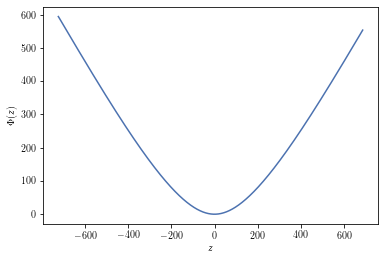

In [16]:
from tqdm import tqdm
from hammer import Model as Model_MCMC

rhoDM = 0.
log_nu0 = 0.
zsun = 0.

theta = concat(rhoDM, log_nu0, zsun)
zmid = zdata[0]
zrange = zmid.max() - zmid.min()
z_b = np.linspace(zmid.min()-zrange/2, zmid.max()+zrange/2, 1000)

ps = psi
pot_b = Model_MCMC.DM.potential(z_b, theta, ps, dz=0.5)

# ind = np.random.choice(np.arange(len(pot_b)), size=500, replace=False)

plt.figure(figsize=(6, 4))
plt.plot(z_b, pot_b.T, alpha=1)
plt.xlabel(r'$z$')
plt.ylabel(r'$\Phi(z)$')
plt.show()


# run_mcmc

In [15]:
from typing import Tuple
from tqdm import tqdm
from time import time
from enum import Enum
from hammer import Model as MCMC_Model
 
class Model(Enum):
    DM = "DM"
    DDDM = "DDDM"
    NO = "NO"
    KIN = "KIN"

func_dict = {
    "DM": MCMC_Model.DM,
    "DDDM": MCMC_Model.DDDM,
    "NO": MCMC_Model.NO,
}

def mcmc_z(model: Model, z_path: str, kin: np.ndarray, pot_b: np.ndarray, z_b: np.ndarray, **options):
    """
    Run MCMC

    Parameters
    ----------
    model: `Model` = `Model.DM`, `Model.DDDM`, or `Model.NO` \n
    z_path: `str` = path to z file \n
    pot_b: `np.ndarray` = shape(nz) \n
    z_b: `np.ndarray` = shape(nz) \n
    kin: `np.ndarray` = shape(4) \n
        - kin[0] = sigma_w1 \n
        - kin[1] = sigma_w2 \n
        - kin[2] = a1 \n
        - kin[3] = a2 \n

    options:
        step0: `int` = 500 \n
        step: `int` = 2000 \n
        burn: `int` = 1000 \n
        it: `int` = 3 \n
        thin: `int` = 20 \n
        verbose: `bool` = True \n
        m: `int` = 10 (multiplier, `nwalker = m*ndim`)
        
    Returns
    -------
    result: `dict` = { \n
        indexes: `ndarray(shape(nparam))`, \n
        labs: `ndarray(shape(nparam))`, \n
        labels: `ndarray(shape(nparam))`, \n
        chain: `ndarray(shape(nstep,nwalker,nparam))` \n
    }
    """
    step0 = options.get("step0", 100)
    step = options.get("step", 2000)
    burn = options.get("burn", 1000)
    it = options.get("it", 3)
    thin = options.get("thin", 20)
    verbose = options.get("verbose", True)
    m = options.get("m", 10)
    func = func_dict[model.value]
    if verbose: print("running...")
    name = z_path.split("/")[-1].replace(".hdf5", "").replace("z_", "")
    zdata = get_data(z_path)
    
    init = generate_init(model)
    locs = init['locs']
    scales = init['scales']    
    indexes = init['indexes']
    labs = init['labs']
    labels = init['labels']

    ndim = len(locs)
    nwalker = m*ndim
    if verbose: print(f"mcmc... {name}")
    p0 = func.generate_p0(nwalker, locs, scales)
    for i in tqdm(range(it), desc="mcmc"):
        t0 = time()
        chain = func.mcmc(step0, p0, kin, pot_b, z_b, zdata, locs, scales,  parallel=True, verbose=verbose)
        t1 = time()
        if verbose: print(f"{i}: first half mcmc done {np.round(t1-t0, 2)} s")
        locs_normal, scales_normal = get_initial_position_normal(model, chain=chain[int(step0/2):])
        p0 = func.generate_p0(nwalker, locs_normal, scales_normal, norm=True)
        t0 = time()
        chain = func.mcmc(step0, p0, kin, pot_b, z_b, zdata, locs, scales, parallel=True, verbose=verbose)
        t1 = time()
        if verbose: print(f"{i}: second half mcmc done {np.round(t1-t0, 2)} s")
        p0 = chain[-1]
    t0 = time()
    chain = func.mcmc(burn, p0, kin, pot_b, z_b, zdata, locs, scales, parallel=True, verbose=verbose)
    t1 = time()
    if verbose: print(f"burn done {np.round(t1-t0, 2)} s")
    p0 = chain[-1]
    t0 = time()
    chain = func.mcmc(step, p0, kin, pot_b, z_b, zdata, locs, scales, parallel=True, verbose=verbose)
    t1 = time()
    if verbose: print(f"mcmc done {np.round(t1-t0, 2)} s")
    chain_thin = chain[::thin]
    return {
        "indexes": indexes,
        "labs": labs,
        "labels": labels,
        "chain": chain_thin
        }

In [18]:
result = mcmc_z(
    model=Model.DM,
    z_path=z_files[index],
    kin=kin,
    pot_b=pot_b,
    z_b=z_b,
    step0=500,
    step=10_000,
    burn=500,
    it=2,
    thin=5,
    m=10
)

result.keys()

running...
mcmc... 05000


mcmc:   0%|          | 0/2 [00:00<?, ?it/s]

0: first half mcmc done 0.2 s

mcmc:  50%|█████     | 1/2 [00:00<00:00,  2.63it/s]


0: second half mcmc done 0.18 s
1: first half mcmc done 0.19 s


mcmc: 100%|██████████| 2/2 [00:00<00:00,  2.58it/s]

1: second half mcmc done 0.2 s
burn done 0.16 s


mcmc done 3.24 s


dict_keys(['indexes', 'labs', 'labels', 'chain'])

In [19]:
chain_thin = result['chain']
indexes = result['indexes']
labs = result['labs']
labels = result['labels']
step, nwalker, ndim = chain_thin.shape
step, nwalker, ndim

(2000, 30, 3)

100%|██████████| 3/3 [00:00<00:00, 76.27it/s]


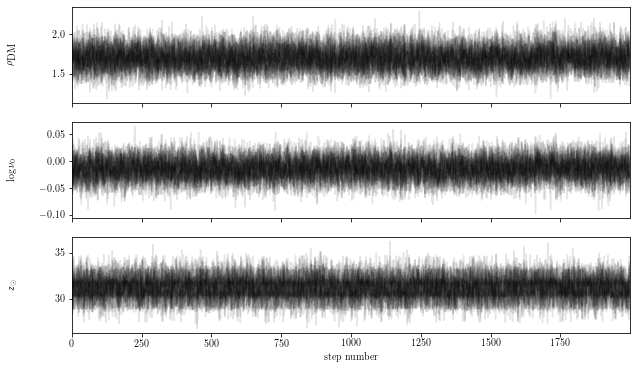

In [20]:
from utils import plot_chain, get_params

params = get_params(chain_thin, indexes, labs)

plot_chain(
    params=params,
    labels=labels,
    alpha=0.1,
    figsize=(10, 6),
)

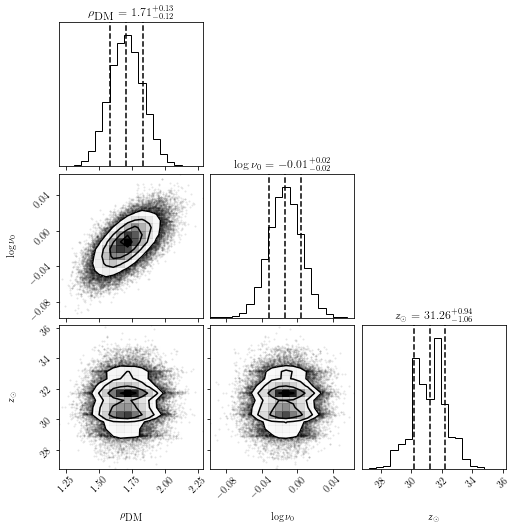

In [21]:
from utils import plot_corner

params = get_params(chain_thin, indexes, labs)

plot_corner(
    params=params,
    labels=labels,
)

# mcmc_parallel

In [10]:
nsample = 200 #len(vel)
psi = np.empty((nsample, 30))

rhob = np.random.normal(rhob_mean, rhob_err, size=(nsample, 12))
sigmaz = np.random.normal(sigmaz_mean, sigmaz_err, size=(nsample, 12))
r = np.random.normal(3.4E-3, 0.6E-3, size=(nsample))
random_indices = np.random.choice(np.arange(len(psi)), size=nsample, replace=False)
w0 = vel[random_indices, 0]
log_sigmaw = vel[random_indices, 1]
q_sigmaw = vel[random_indices, 2]
log_a = vel[random_indices, 3]
q_a = vel[random_indices, 4]

# w0 = vel[:, 0]
# log_sigmaw = vel[:, 1]
# q_sigmaw = vel[:, 2]
# log_a = vel[:, 3]
# q_a = vel[:, 4]

# combine
psi[:, :12] = rhob
psi[:, 12:24] = sigmaz
psi[:, 24] = r
psi[:, 25] = w0
psi[:, 26] = log_sigmaw
psi[:, 27] = q_sigmaw
psi[:, 28] = log_a
psi[:, 29] = q_a

kin = np.empty((nsample, 4))
kin[:, 0] = np.exp(log_sigmaw)
kin[:, 1] = kin[:, 0] / q_sigmaw
kin[:, 2] = np.exp(log_a)
kin[:, 3] = kin[:, 2] * q_a
atot = kin[:, 2] + kin[:, 3]
kin[:, 2] = kin[:, 2] / atot
kin[:, 3] = kin[:, 3] / atot

psi.shape, kin.shape

((200, 30), (200, 4))

100%|██████████| 200/200 [00:00<00:00, 1115.41it/s]


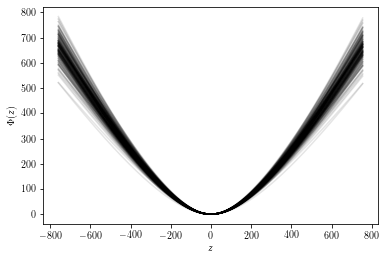

In [11]:
from tqdm import tqdm
from hammer import Model as Model_MCMC

rhoDM = 0.
log_nu0 = 0.
zsun = 0.

theta = concat(rhoDM, log_nu0, zsun)
zmid = zdata[0]
zrange = zmid.max() - zmid.min()
z_b = np.linspace(zmid.min()-zrange/2, zmid.max()+zrange/2, 1000)

pot_b = np.empty((nsample, len(z_b)))

for i in tqdm(range(nsample)):
    ps = psi[i]
    pot_b[i] = Model_MCMC.DM.potential(z_b, theta, ps, dz=0.5)

# ind = np.random.choice(np.arange(len(pot_b)), size=500, replace=False)

plt.figure(figsize=(6, 4))
plt.plot(z_b, pot_b.T, alpha=0.1, color='k')
plt.xlabel(r'$z$')
plt.ylabel(r'$\Phi(z)$')
plt.show()


In [12]:
from typing import Tuple
from tqdm import tqdm
from time import time
from enum import Enum
from hammer import Model as MCMC_Model
 
class Model(Enum):
    DM = "DM"
    DDDM = "DDDM"
    NO = "NO"
    KIN = "KIN"

func_dict = {
    "DM": MCMC_Model.DM,
    "DDDM": MCMC_Model.DDDM,
    "NO": MCMC_Model.NO,
}

def mcmc_parallel_z(model: Model, z_path: str, kin: np.ndarray, pot_b: np.ndarray, z_b: np.ndarray, **options):
    """
    Run MCMC

    Parameters
    ----------
    model: `Model` = `Model.DM`, `Model.DDDM`, or `Model.NO` \n
    z_path: `str` = path to z file \n
    pot_b: `np.ndarray` = shape(nmcmc, nz) \n
    z_b: `np.ndarray` = shape(nz) \n
    kin: `np.ndarray` = shape(nmcmc, 4) \n
        - kin[:, 0] = sigma_w1 \n
        - kin[:, 1] = sigma_w2 \n
        - kin[:, 2] = a1 \n
        - kin[:, 3] = a2 \n

    options:
        step0: `int` = 500 \n
        step: `int` = 2000 \n
        burn: `int` = 1000 \n
        it: `int` = 3 \n
        thin: `int` = 20 \n
        verbose: `bool` = True \n
        m: `int` = 10 (multiplier, `nwalker = m*ndim`)
        
    Returns
    -------
    result: `dict` = { \n
        indexes: `ndarray(shape(nparam))`, \n
        labs: `ndarray(shape(nparam))`, \n
        labels: `ndarray(shape(nparam))`, \n
        chain: `ndarray(shape(nstep,nwalker,nparam))` \n
    }
    """
    step0 = options.get("step0", 100)
    step = options.get("step", 2000)
    burn = options.get("burn", 1000)
    it = options.get("it", 3)
    thin = options.get("thin", 20)
    verbose = options.get("verbose", True)
    m = options.get("m", 10)
    func = func_dict[model.value]
    if verbose: print("running...")
    name = z_path.split("/")[-1].replace(".hdf5", "").replace("z_", "")
    zdata = get_data(z_path)
    
    init = generate_init(model)
    locs = init['locs']
    scales = init['scales']    
    indexes = init['indexes']
    labs = init['labs']
    labels = init['labels']

    ndim = len(locs)
    nwalker = m*ndim
    n_mcmc = pot_b.shape[0]
    if verbose: print(f"mcmc... {name}")
    p0 = func.generate_p0(nwalker, locs, scales)
    p0 = np.tile(p0, (n_mcmc, 1, 1))
    print(p0.shape)
    for i in tqdm(range(it), desc="mcmc"):
        t0 = time()
        chain = func.mcmc_parallel(step0, p0, kin, pot_b, z_b, zdata, locs, scales,  parallel=True, verbose=verbose)
        t1 = time()
        if verbose: print(f"{i}: first half mcmc done {np.round(t1-t0, 2)} s")
        for j in range(n_mcmc):
            locs_normal, scales_normal = get_initial_position_normal(model, chain=chain[j, int(step0/2):])
            p0_j = func.generate_p0(nwalker, locs_normal, scales_normal, norm=True)
            p0[j] = p0_j
        t0 = time()
        chain = func.mcmc_parallel(step0, p0, kin, pot_b, z_b, zdata, locs, scales, parallel=True, verbose=verbose)
        t1 = time()
        if verbose: print(f"{i}: second half mcmc done {np.round(t1-t0, 2)} s")
        p0 = chain[:, -1]
    t0 = time()
    chain = func.mcmc_parallel(burn, p0, kin, pot_b, z_b, zdata, locs, scales, parallel=True, verbose=verbose)
    t1 = time()
    if verbose: print(f"burn done {np.round(t1-t0, 2)} s")
    p0 = chain[:, -1]
    t0 = time()
    chain = func.mcmc_parallel(step, p0, kin, pot_b, z_b, zdata, locs, scales, parallel=True, verbose=verbose)
    t1 = time()
    if verbose: print(f"mcmc done {np.round(t1-t0, 2)} s")
    chain_thin = chain[:, ::thin]
    return {
        "indexes": indexes,
        "labs": labs,
        "labels": labels,
        "chain": chain_thin
        }

In [13]:
pot_b.shape

(200, 1000)

In [14]:
# mask = np.random.choice(np.arange(len(pot_b)), size=500, replace=False)

result = mcmc_parallel_z(
    model=Model.DM,
    z_path=z_files[index],
    kin=kin,
    pot_b=pot_b,
    z_b=z_b,
    step0=100,
    step=100,
    burn=100,
    it=1,
    thin=2,
    m=10
)
# result.shape
result.keys()

running...
mcmc... 10000
(200, 30, 3)


mcmc:   0%|          | 0/1 [00:00<?, ?it/s]

0: first half mcmc done 4.76 s


mcmc: 100%|██████████| 1/1 [00:09<00:00,  9.70s/it]

0: second half mcmc done 4.76 s
burn done 4.71 s
mcmc done 4.68 s

dict_keys(['indexes', 'labs', 'labels', 'chain'])

In [15]:
chain_thin = result['chain']
indexes = result['indexes']
labs = result['labs']
labels = result['labels']
n_mcmc, step, nwalker, ndim = chain_thin.shape
n_mcmc, step, nwalker, ndim

(200, 50, 30, 3)

# plot_chain

100%|██████████| 3/3 [00:06<00:00,  2.19s/it]


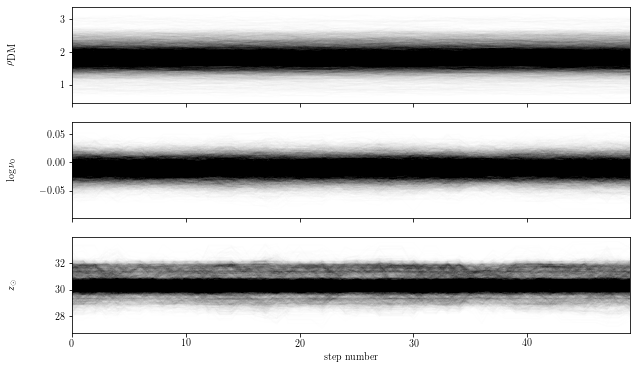

In [16]:
from utils import plot_chain, get_params

chain = np.transpose(chain_thin, (1, 0, 2, 3)).reshape((step, -1, ndim))
params = get_params(chain, indexes, labs)

plot_chain(
    params=params,
    labels=labels,
    alpha=0.002,
    figsize=(10, 6),
)

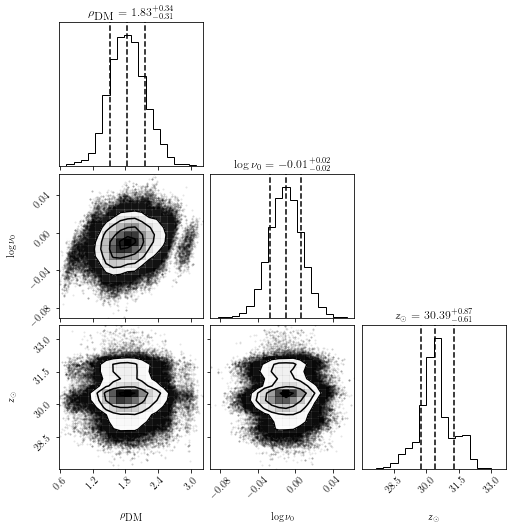

In [17]:
from utils import plot_corner

plot_corner(
    params=params,
    labels=labels,
)

# plot_fit

In [22]:
from tqdm import tqdm
from hammer import Model as MCMC_Model
from scipy.stats import median_abs_deviation as mad
 
class Model(Enum):
    DM = "DM"
    DDDM = "DDDM"
    NO = "NO"
    KIN = "KIN"

func_dict = {
    "DM": MCMC_Model.DM,
    "DDDM": MCMC_Model.DDDM,
    "NO": MCMC_Model.NO,
}


sigma_68 = 0.994458
sigma_90 = 1.644854
sigma_95 = 1.959964

def plot_fit_z(model: Model, flat_chains: np.ndarray, zdata: Tuple[np.ndarray,np.ndarray,np.ndarray], psi: np.ndarray, **options: dict):
    """required: 
            model: `Model` = Model.DM \n
            flat_chain: `ndarray(shape=(n_mcmc, nsample, nparam))`\n
            zdata: `Tuple[np.ndarray,np.ndarray,np.ndarray]` = (zmid, znum, zerr) \n
            psi: `np.ndarray(shape(n_mcmc, 30))` = psi \n
        options:
            res: `int` = 100 \n
            nsample: `int` = 5_000 \n
            figsize: `Tuple[int, int]` = (10, 10) \n
            alpha: `float` = 0.1 \n
            c: `str` = C0 \n
            log: `bool` = False \n
            dpi: `int` = 70 \n
            path: `str` = None \n
            fig_kw: `Dict` = All additional keyword arguments for `.pyplot.figure`.
            """
    res = options.get('res', 100)
    nsample = options.get('nsample', 5_000)
    figsize = options.get('figsize', (10, 6))
    alpha = options.get('alpha', 0.1)
    c = options.get('c', "C0")
    log = options.get('log', False)
    dpi = options.get('dpi', 70)
    path = options.get('path', None)
    fig_kw  = options.get('fig_kw', {})
    func = func_dict.get(model.value, MCMC_Model.DM)
    
    zmid, znum, zerr = zdata
    zs: np.ndarray[np.float64] = np.linspace(zmid.min()*1.1, zmid.max()*1.1, res)
    log_fzs = np.empty((nsample, len(zs)))
    for i in tqdm(range(nsample)):
        psi_ind = np.random.randint(len(flat_chains))
        ind = np.random.randint(flat_chains.shape[1])
        theta = flat_chains[psi_ind, ind]
        ind = np.random.randint(len(psi))
        ps = psi[psi_ind]
        log_fzs[i] = np.log(func.fz(zs, theta, ps))

    fz_log_mean = np.median(log_fzs,axis=0)
    fz_log_std = mad(log_fzs, axis=0)

    fig, ax = plt.subplots(1, 1, figsize=figsize, **fig_kw)
    ax.errorbar(zmid, znum, yerr=zerr, color='k',
                alpha=1, capsize=2, fmt=".")
    ax.plot(zs, np.exp(fz_log_mean), c=c, ls="--")
    for sigma in [sigma_95, sigma_90, sigma_68]:
        ax.fill_between(zs, np.exp(fz_log_mean - sigma*fz_log_std),
                        np.exp(fz_log_mean + sigma*fz_log_std), alpha=alpha, color=c)
    ax.set_ylabel(r'$f_0(z)$')
    ax.set_xlabel(r'$z$ [km/s]')
    ax.set_xlim(zs.min(), zs.max())
    if log:
        ax.set_yscale("log")
        ax.set_ylim(np.exp(fz_log_mean - sigma_95*fz_log_std).min(),
                    np.exp(fz_log_mean + sigma_95*fz_log_std).max()*1.5)
    else:
        ax.set_ylim(0)
    if path is not None:
        fig.savefig(path, dpi=dpi)
    plt.show()

100%|██████████| 10000/10000 [00:05<00:00, 1786.82it/s]


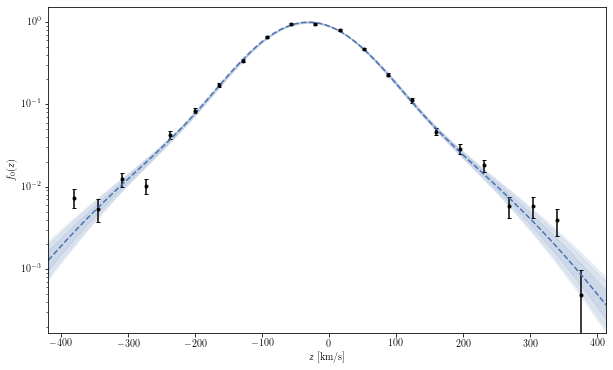

In [23]:
from utils import get_data
zdata = get_data(z_files[index])
flat_chains = chain_thin.reshape(n_mcmc, -1, ndim)
# flat_chains.shape
plot_fit_z(
    model=Model.DM,
    flat_chains=flat_chains,
    zdata=zdata,
    psi=psi,
    log=True,
    nsample=10_000,
    res=100
)

  0%|          | 0/20000 [00:00<?, ?it/s]

100%|██████████| 20000/20000 [00:09<00:00, 2088.31it/s]


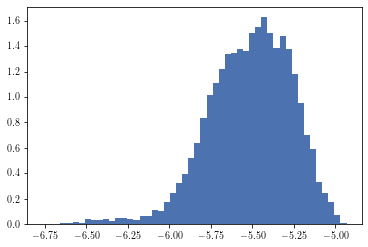

In [20]:
nsample = 20_000
log_fzs = np.empty((nsample))
for i in tqdm(range(nsample)):
    psi_ind = np.random.randint(len(flat_chains))
    ind = np.random.randint(flat_chains.shape[1])
    theta = flat_chains[psi_ind, ind]
    ind = np.random.randint(len(psi))
    ps = psi[psi_ind]
    log_fzs[i] = np.log(Model_MCMC.DM.fz(np.array([300.]), theta, ps))
    
plt.hist(log_fzs, bins=50, density=True);

# calculate max likelihood

In [31]:
from datetime import datetime
from typing import Tuple

def calculate_prob(
        model: Model, 
        flat_chains: np.ndarray, 
        zdata: Tuple[np.ndarray, np.ndarray, np.ndarray], 
        kin: np.ndarray, 
        pot_b: np.ndarray,
        z_b: np.ndarray,
        **options: dict
    ):
    """
    Calculate maximum likelihood, BIC, and AIC, then save the result to a file

    Parameters
    ----------
    model: `Model` = `Model.DM`, `Model.DDDM`, or `Model.NO` \n
    flat_chain: ndarray(shape=(n_mcmc, length, ndim)) \n
    zdata: ndarray = (zmid, znum, zerr) \n
    kin: ndarray = (n_mcmc, kin) \n
    pot_b: ndarray = (n_mcmc, pot_b) \n
    z_b: ndarray = (n_mcmc, z_b) \n
    options:
        nsample: `int` = 10_000 \n
        verbose: `bool` = True \n
        batch: `int` = 1000 \n
    """
    nsample = options.get("nsample", 10_000)
    verbose = options.get("verbose", True)
    batch = options.get("batch", 1000)
    func = func_dict[model.value]
    if verbose: print("Opening the data")
    init = generate_init(model)
    locs = init['locs']
    scales = init['scales']
    if verbose: print("Opening the chain")
    n_mcmc, length, ndim = flat_chains.shape
    # calculate likelihood
    if verbose: print("Calculating likelihood")
    mx_l = np.empty(n_mcmc)
    bics = np.empty(n_mcmc)
    aics = np.empty(n_mcmc)
    for i in tqdm(range(n_mcmc)):
        ind = np.random.choice(length, nsample, replace=True)
        theta = flat_chains[i, ind]
        probs = func.log_prob_par(theta, kin[i], zdata, pot_b[i], z_b, locs, scales, batch=batch)
        likelihood = probs[:, 1]
        # remove nan from likelihood
        likelihood = likelihood[~np.isnan(likelihood)]
        max_likelihood = np.max(likelihood)
        # calculate BIC
        zmid = zdata[0]
        bic = -2 * max_likelihood + ndim * np.log(3*len(zmid))
        aic = -2 * max_likelihood + 2 * ndim
        mx_l[i] = max_likelihood
        bics[i] = bic
        aics[i] = aic
    df = vaex.from_arrays(max_likelihood=mx_l, bic=bics, aic=aics)
    return df

    # print(f"max log-likelihood: {max_likelihood}")
    # print(f"BIC: {bic}")
    # print(f"AIC: {aic}")
    # with open(path, 'a') as f:
    #     f.write(f"{name},{max_likelihood},{bic},{aic},{datetime.now()}\n")

In [32]:
prob_df = calculate_prob(
    model=Model.DM, 
    flat_chains=flat_chains,
    zdata=zdata,
    kin=kin,
    pot_b=pot_b,
    z_b=z_b,
    name=name,
    path="./",
)
prob_df

Opening the data
Opening the chain
Calculating likelihood


100%|██████████| 200/200 [00:30<00:00,  6.45it/s]


#,max_likelihood,bic,aic
0,75.3393451073897,-138.10972598870012,-144.6786902147794
1,75.59795239021365,-138.626940554348,-145.1959047804273
2,74.7948088547571,-137.0206534834349,-143.5896177095142
3,75.38502204838345,-138.2010798706876,-144.7700440967669
4,71.19599456526504,-129.8230249044508,-136.39198913053008
...,...,...,...
195,76.26238746519432,-139.95581070430936,-146.52477493038865
196,74.84074782379126,-137.11253142150323,-143.68149564758252
197,75.79389097020683,-139.01881771433438,-145.58778194041366
198,67.33251393296044,-122.0960636398416,-128.66502786592088


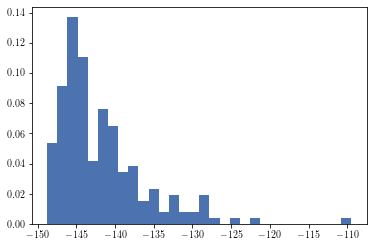

In [30]:
aics = prob_df.aic.to_numpy()
bics = prob_df.bic.to_numpy()
plt.hist(aics, bins=30, density=True);
# plt.hist(bics, bins=30, density=True);

# Script

do mcmc for

* same $N$, different $z$
* same $z$, different $N$

Each 'running' contains
1. generate_init: initial position for walkers.
    * this is done by the experiment above.
2. run_mcmc: run true mcmc for 10_000 steps.
3. plot trace: plot trace plot for preliminary mcmc.
4. plot corner: plot corner plot for the long run.
5. plot fit: fitting plot for vertical density and vertical dispersion.
6. calculate bic & aic: calculate bic and aic for the long run.

All of these functionalities are implemented in `mcmc.py` at `utils`.

Just run the `program.py` at `script`.
To automate the process for all data, run `run_program.py` at `script`.

# test utils

In [1]:
from os.path import abspath, join
from glob import glob
import vaex
from matplotlib import pyplot as plt
import sys
import numpy as np
current = abspath("")
root_dir = abspath(join(current, '..'))
root_data_dir = join(root_dir, "Data")
import sys
if not root_dir in sys.path: 
    sys.path.append(root_dir)

In [2]:
from utils import (style, concat, get_params, mcmc_parallel_z, plot_chain, plot_corner, plot_fit_z, calculate_prob, get_data, Model)

style()

In [3]:
z_dir_path = join(root_data_dir, 'MCMC-no', 'mock', 'data', 'z')
z_dir_path

'/home2/s20321005/Thesis-Project/Data/MCMC-no/mock/data/z'

In [4]:
name = "Baryon"
baryon_dir = join(root_data_dir, name)
# load baryons components
df_baryon = vaex.open(join(baryon_dir, "baryon.hdf5"))
df_baryon

#,components,rho,e_rho,sigma_z,e_sigma_z
0,Molecular gas (H2),0.0104,0.00312,3.7,0.2
1,Cold atomic gas (HI(1)),0.0277,0.00554,7.1,0.5
2,Warm atomic gas (HI(2)),0.0073,0.0007,22.1,2.4
3,Hot ionized gas (HII),0.0005,3e-05,39.0,4.0
4,Giant stars,0.0006,6e-05,15.5,1.6
...,...,...,...,...,...
7,4 < MV < 5,0.0029,0.00029,18.0,1.8
8,5 < MV < 8,0.0072,0.00072,18.5,1.9
9,MV > 8,0.0216,0.0028,18.5,4.0
10,White dwarfs,0.0056,0.001,20.0,5.0


In [5]:
rhob_mean = df_baryon['rho'].to_numpy()
rhob_err = df_baryon['e_rho'].to_numpy()
sigmaz_mean = df_baryon['sigma_z'].to_numpy()
sigmaz_err = df_baryon['e_sigma_z'].to_numpy()

In [6]:
vel_dir_path = join(root_data_dir, "MCMC-no", "mock", "result", "z", "vel", "data")
vel_files = glob(join(vel_dir_path, "*.npy"))
vel_files.sort()
vel_files

['/home2/s20321005/Thesis-Project/Data/MCMC-no/mock/result/z/vel/data/chain_0.4.npy',
 '/home2/s20321005/Thesis-Project/Data/MCMC-no/mock/result/z/vel/data/chain_0.6.npy',
 '/home2/s20321005/Thesis-Project/Data/MCMC-no/mock/result/z/vel/data/chain_0.8.npy',
 '/home2/s20321005/Thesis-Project/Data/MCMC-no/mock/result/z/vel/data/chain_1.0.npy',
 '/home2/s20321005/Thesis-Project/Data/MCMC-no/mock/result/z/vel/data/chain_1.5.npy',
 '/home2/s20321005/Thesis-Project/Data/MCMC-no/mock/result/z/vel/data/chain_2.0.npy']

In [7]:
index = 4
z_files = glob(join(z_dir_path, "z*"))
z_files.sort()
z_files

['/home2/s20321005/Thesis-Project/Data/MCMC-no/mock/data/z/z_0.4.hdf5',
 '/home2/s20321005/Thesis-Project/Data/MCMC-no/mock/data/z/z_0.6.hdf5',
 '/home2/s20321005/Thesis-Project/Data/MCMC-no/mock/data/z/z_0.8.hdf5',
 '/home2/s20321005/Thesis-Project/Data/MCMC-no/mock/data/z/z_1.0.hdf5',
 '/home2/s20321005/Thesis-Project/Data/MCMC-no/mock/data/z/z_1.5.hdf5',
 '/home2/s20321005/Thesis-Project/Data/MCMC-no/mock/data/z/z_2.0.hdf5']

In [8]:
name = z_files[index].split("/")[-1].replace(".hdf5", "").replace("z_", "")
zdata = get_data(z_files[index])
vel = np.load(vel_files[index])
zdata, name, vel[:5]

((array([-443.65726971, -404.76754211, -365.87781451, -326.98808691,
         -288.0983593 , -249.2086317 , -210.3189041 , -171.4291765 ,
         -132.5394489 ,  -93.64972129,  -54.75999369,  -15.87026609,
           23.01946151,   61.90918912,  100.79891672,  139.68864432,
          178.57837192,  217.46809952,  256.35782713,  295.24755473,
          334.13728233,  450.80646514]),
  array([1.81804314e-03, 3.63608628e-03, 5.45412942e-03, 7.27217256e-03,
         1.45443451e-02, 2.99977118e-02, 5.72683589e-02, 1.31808128e-01,
         3.61790585e-01, 6.34497055e-01, 9.67198950e-01, 9.28111022e-01,
         7.05400738e-01, 3.61790585e-01, 1.79986271e-01, 7.81758550e-02,
         2.63616255e-02, 2.72706471e-02, 1.09082588e-02, 8.18119412e-03,
         2.72706471e-03, 9.09021569e-04]),
  array([0.00128555, 0.00181804, 0.00222664, 0.0025711 , 0.00363609,
         0.00522193, 0.00721514, 0.01094607, 0.01813492, 0.02401607,
         0.02965139, 0.02904605, 0.02532241, 0.01813492, 0.01279107,

In [9]:
m = 100
nsample = vel[::m, 0].shape[0]
psi = np.empty((nsample, 30))

rhob = np.random.normal(rhob_mean, rhob_err, size=(nsample, 12))
sigmaz = np.random.normal(sigmaz_mean, sigmaz_err, size=(nsample, 12))
r = np.random.normal(3.4E-3, 0.6E-3, size=(nsample))
# random_indices = np.random.choice(np.arange(len(psi)), size=nsample, replace=False)
w0 = vel[::m, 0]
log_sigmaw = vel[::m, 1]
q_sigmaw = vel[::m, 2]
log_a = vel[::m, 3]
q_a = vel[::m, 4]

# combine
psi[:, :12] = rhob
psi[:, 12:24] = sigmaz
psi[:, 24] = r
psi[:, 25] = w0
psi[:, 26] = log_sigmaw
psi[:, 27] = q_sigmaw
psi[:, 28] = log_a
psi[:, 29] = q_a

kin = np.empty((nsample, 4))
kin[:, 0] = np.exp(log_sigmaw)
kin[:, 1] = kin[:, 0] / q_sigmaw
kin[:, 2] = np.exp(log_a)
kin[:, 3] = kin[:, 2] * q_a
atot = kin[:, 2] + kin[:, 3]
kin[:, 2] = kin[:, 2] / atot
kin[:, 3] = kin[:, 3] / atot

psi.shape, kin.shape

((600, 30), (600, 4))

100%|██████████| 600/600 [00:00<00:00, 882.57it/s]


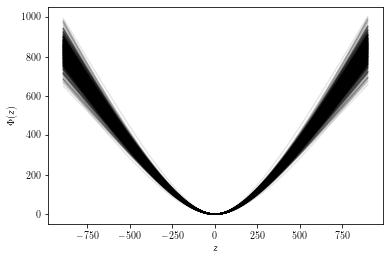

In [10]:
from tqdm import tqdm
from hammer import Model as Model_MCMC

rhoDM = 0.
log_nu0 = 0.
zsun = 0.

theta = concat(rhoDM, log_nu0, zsun)
zmid = zdata[0]
zrange = zmid.max() - zmid.min()
z_b = np.linspace(zmid.min()-zrange/2, zmid.max()+zrange/2, 5000)

pot_b = np.empty((nsample, len(z_b)))

for i in tqdm(range(nsample)):
    ps = psi[i]
    pot_b[i] = Model_MCMC.DM.potential(z_b, theta, ps, dz=0.5)

# ind = np.random.choice(np.arange(len(pot_b)), size=500, replace=False)

plt.figure(figsize=(6, 4))
plt.plot(z_b, pot_b.T, alpha=0.1, color='k')
plt.xlabel(r'$z$')
plt.ylabel(r'$\Phi(z)$')
plt.show()


In [11]:
print(mcmc_parallel_z.__doc__)


    Run MCMC

    Parameters
    ----------
    model: `Model` = `Model.DM`, `Model.DDDM`, or `Model.NO` 

    z_path: `str` = path to z file 

    pot_b: `np.ndarray` = shape(nmcmc, nz) 

    z_b: `np.ndarray` = shape(nz) 

    kin: `np.ndarray` = shape(nmcmc, 4) 

        - kin[:, 0] = sigma_w1 

        - kin[:, 1] = sigma_w2 

        - kin[:, 2] = a1 

        - kin[:, 3] = a2 


    options:
        step0: `int` = 500 

        step: `int` = 2000 

        burn: `int` = 1000 

        it: `int` = 3 

        thin: `int` = 20 

        verbose: `bool` = True 

        m: `int` = 10 (multiplier, `nwalker = m*ndim`)
        
    Returns
    -------
    result: `dict` = { 

        indexes: `ndarray(shape(nparam))`, 

        labs: `ndarray(shape(nparam))`, 

        labels: `ndarray(shape(nparam))`, 

        chain: `ndarray(shape(nstep,nwalker,nparam))` 

    }
    


# DM

In [12]:
result = mcmc_parallel_z(
    model=Model.DM,
    z_path=z_files[index],
    kin=kin,
    pot_b=pot_b,
    z_b=z_b,
    step0=100,
    step=100,
    burn=100,
    it=1,
    thin=2,
    m=10
)
# result.shape
result.keys()

running...
mcmc... 1.5
(600, 30, 3)


mcmc:   0%|          | 0/1 [00:00<?, ?it/s]

0: first half mcmc done 52.33 s


mcmc: 100%|██████████| 1/1 [01:45<00:00, 105.14s/it]

0: second half mcmc done 52.27 s


burn done 52.28 s
mcmc done 52.74 s


dict_keys(['indexes', 'labs', 'labels', 'chain'])

In [13]:
chain_thin = result['chain']
indexes = result['indexes']
labs = result['labs']
labels = result['labels']
n_mcmc, step, nwalker, ndim = chain_thin.shape
n_mcmc, step, nwalker, ndim

(600, 50, 30, 3)

100%|██████████| 3/3 [00:01<00:00,  1.59it/s]


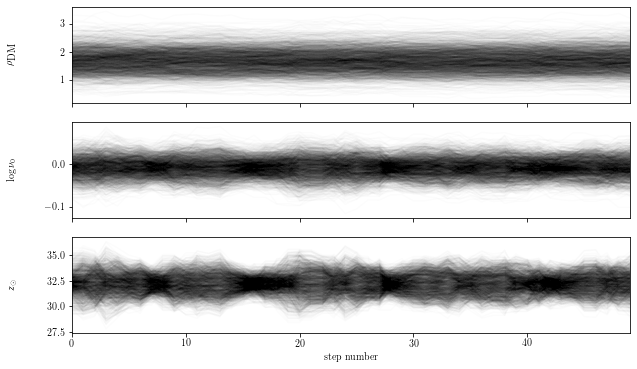

In [14]:
chain = np.transpose(chain_thin, (1, 0, 2, 3)).reshape((step, -1, ndim))
params = get_params(chain, indexes, labs)

plot_chain(
    params=params[:, ::10],
    labels=labels,
    alpha=0.01,
    figsize=(10, 6),
)

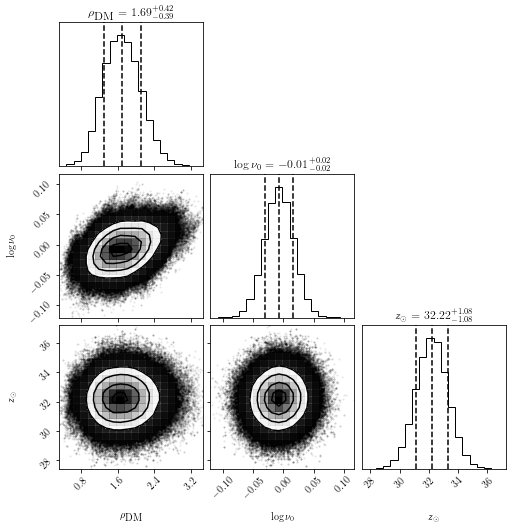

In [15]:
plot_corner(
    params=params,
    labels=labels,
)

 16%|█▌        | 1587/10000 [00:01<00:04, 1683.59it/s]

100%|██████████| 10000/10000 [00:05<00:00, 1722.08it/s]


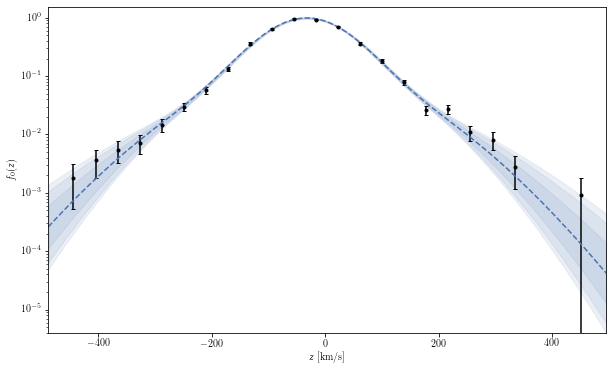

In [16]:
zdata = get_data(z_files[index])
flat_chains = chain_thin.reshape(n_mcmc, -1, ndim)
# flat_chains.shape
plot_fit_z(
    model=Model.DM,
    flat_chains=flat_chains,
    zdata=zdata,
    psi=psi,
    log=True,
    nsample=10_000,
    res=100
)

In [17]:
prob_df = calculate_prob(
    model=Model.DM, 
    flat_chains=flat_chains,
    zdata=zdata,
    kin=kin,
    pot_b=pot_b,
    z_b=z_b,
)
prob_df

Opening the data
Opening the chain
Calculating likelihood


100%|██████████| 600/600 [04:06<00:00,  2.44it/s]


#,max_likelihood,bic,aic
0,72.96147784206134,-133.3539914580434,-139.92295568412268
1,50.13365265364421,-87.69834108120915,-94.26730530728842
2,77.93712919295943,-143.30529415983958,-149.87425838591886
3,71.40461641661891,-130.24026860715853,-136.80923283323781
4,82.61207927835052,-152.65519433062175,-159.22415855670104
...,...,...,...
595,81.88009484641462,-151.19122546674996,-157.76018969282924
596,65.66492614392241,-118.76088806176556,-125.32985228784483
597,83.83139766975115,-155.09383111342302,-161.6627953395023
598,80.83328730649369,-149.0976103869081,-155.66657461298738


-162.34251364584938


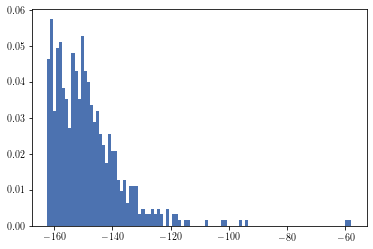

In [18]:
aics = prob_df.aic.to_numpy()
bics = prob_df.bic.to_numpy()
plt.hist(aics, bins=100, density=True);
print(aics.min())

## DDDM

In [67]:
result = mcmc_parallel_z(
    model=Model.DDDM,
    z_path=z_files[index],
    kin=kin,
    pot_b=pot_b,
    z_b=z_b,
    step0=100,
    step=100,
    burn=100,
    it=1,
    thin=2,
    m=10
)
# result.shape
result.keys()

running...
mcmc... 1.5
(600, 50, 5)


mcmc:   0%|          | 0/1 [00:00<?, ?it/s]

0: first half mcmc done 23.81 s


mcmc: 100%|██████████| 1/1 [00:48<00:00, 48.72s/it]

0: second half mcmc done 23.77 s
burn done 23.75 s
mcmc done 23.83 s

dict_keys(['indexes', 'labs', 'labels', 'chain'])

In [68]:
chain_thin = result['chain']
indexes = result['indexes']
labs = result['labs']
labels = result['labels']
n_mcmc, step, nwalker, ndim = chain_thin.shape
n_mcmc, step, nwalker, ndim

(600, 50, 50, 5)

  0%|          | 0/5 [00:00<?, ?it/s]

100%|██████████| 5/5 [00:05<00:00,  1.15s/it]


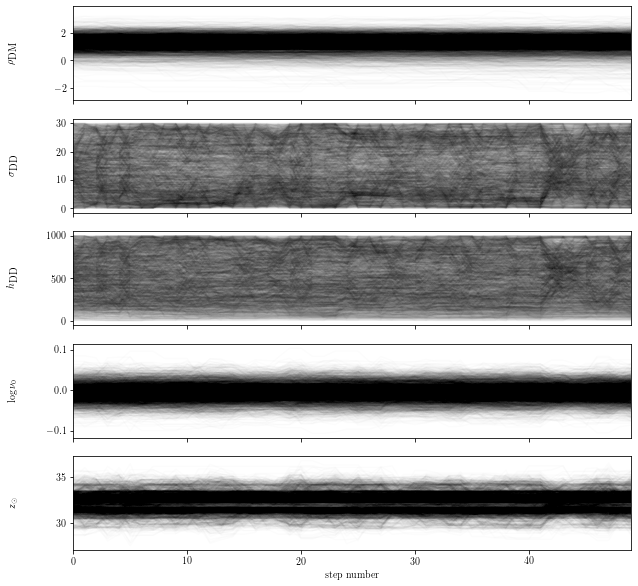

In [69]:
chain = np.transpose(chain_thin, (1, 0, 2, 3)).reshape((step, -1, ndim))
params = get_params(chain, indexes, labs)

plot_chain(
    params=params[:, ::10],
    labels=labels,
    alpha=0.01,
    figsize=(10, 10),
)

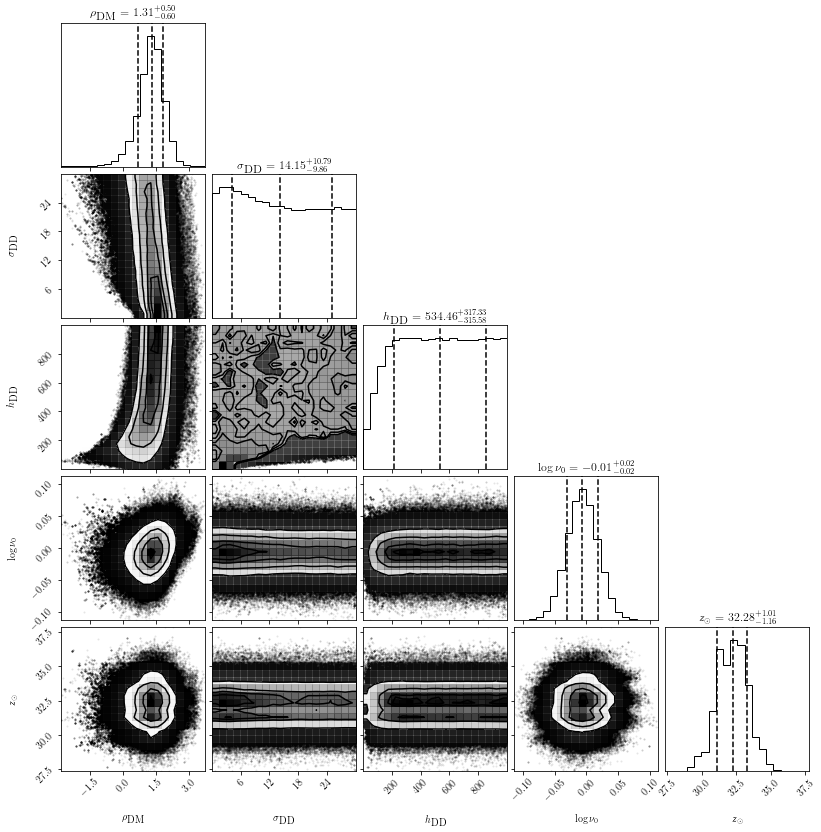

In [70]:
plot_corner(
    params=params,
    labels=labels,
)

100%|██████████| 10000/10000 [00:05<00:00, 1692.71it/s]


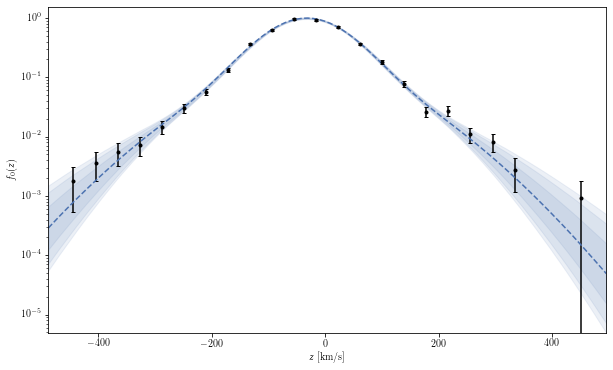

In [71]:
zdata = get_data(z_files[index])
flat_chains = chain_thin.reshape(n_mcmc, -1, ndim)
# flat_chains.shape
plot_fit_z(
    model=Model.DDDM,
    flat_chains=flat_chains,
    zdata=zdata,
    psi=psi,
    log=True,
    nsample=10_000,
    res=100
)

In [ ]:
prob_df = calculate_prob(
    model=Model.DDDM, 
    flat_chains=flat_chains,
    zdata=zdata,
    kin=kin,
    pot_b=pot_b,
    z_b=z_b,
)
prob_df

In [ ]:
aics = prob_df.aic.to_numpy()
bics = prob_df.bic.to_numpy()
plt.hist(aics, bins=100, density=True);
# plt.hist(bics, bins=30, density=True);

# NO

In [72]:
result = mcmc_parallel_z(
    model=Model.NO,
    z_path=z_files[index],
    kin=kin,
    pot_b=pot_b,
    z_b=z_b,
    step0=100,
    step=100,
    burn=100,
    it=1,
    thin=2,
    m=10
)
# result.shape
result.keys()

running...
mcmc... 1.5
(600, 30, 3)


mcmc:   0%|          | 0/1 [00:00<?, ?it/s]

0: first half mcmc done 14.04 s


mcmc: 100%|██████████| 1/1 [00:28<00:00, 28.51s/it]

0: second half mcmc done 13.94 s
burn done 13.86 s
mcmc done 13.85 s


dict_keys(['indexes', 'labs', 'labels', 'chain'])

In [74]:
chain_thin = result['chain']
indexes = result['indexes']
labs = result['labs']
labels = result['labels']
n_mcmc, step, nwalker, ndim = chain_thin.shape
n_mcmc, step, nwalker, ndim

(600, 50, 30, 3)

  0%|          | 0/3 [00:00<?, ?it/s]

100%|██████████| 3/3 [00:02<00:00,  1.25it/s]


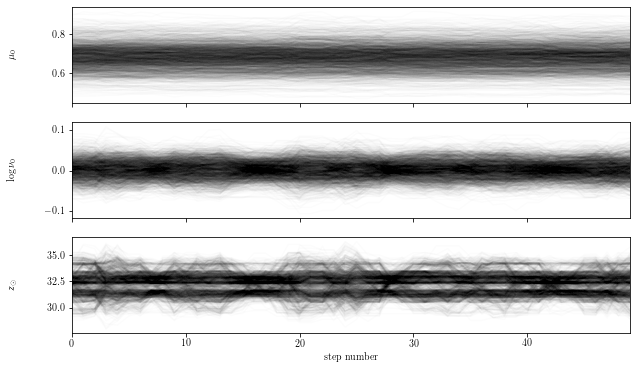

In [75]:
chain = np.transpose(chain_thin, (1, 0, 2, 3)).reshape((step, -1, ndim))
params = get_params(chain, indexes, labs)

plot_chain(
    params=params[:, ::10],
    labels=labels,
    alpha=0.01,
    figsize=(10, 6),
)

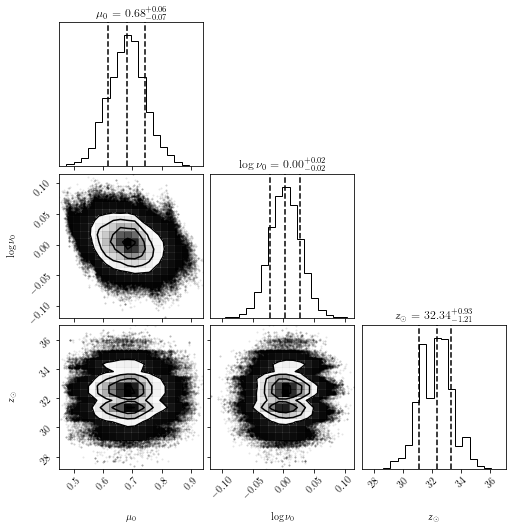

In [76]:
plot_corner(
    params=params,
    labels=labels,
)

100%|██████████| 10000/10000 [00:06<00:00, 1638.82it/s]


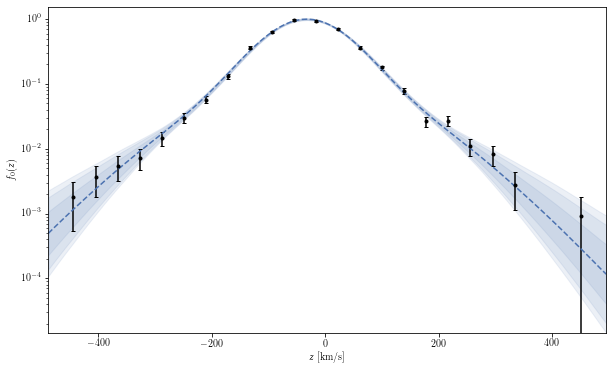

In [79]:
zdata = get_data(z_files[index])
flat_chains = chain_thin.reshape(n_mcmc, -1, ndim)
# flat_chains.shape
plot_fit_z(
    model=Model.NO,
    flat_chains=flat_chains,
    zdata=zdata,
    psi=psi,
    log=True,
    nsample=10_000,
    res=100
)

In [80]:
prob_df = calculate_prob(
    model=Model.NO, 
    flat_chains=flat_chains,
    zdata=zdata,
    kin=kin,
    pot_b=pot_b,
    z_b=z_b,
)
prob_df

Opening the data
Opening the chain
Calculating likelihood


100%|██████████| 600/600 [01:31<00:00,  6.54it/s]


#,max_likelihood,bic,aic
0,75.87450078512921,-139.18003734417914,-145.74900157025843
1,20.09728640347726,-27.625608580875245,-34.19457280695452
2,79.01000377456847,-145.45104332305766,-152.02000754913695
3,74.84020575785583,-137.11144728963237,-143.68041151571165
4,83.14681444538346,-153.72466466468762,-160.2936288907669
...,...,...,...
595,80.89894006574384,-149.2289159054084,-155.7978801314877
596,71.12877754331926,-129.68859086055923,-136.25755508663852
597,79.98800204409697,-147.40703986211466,-153.97600408819395
598,75.2830941097038,-137.9972239933283,-144.5661882194076


In [19]:
prob_df = vaex.open(join(root_data_dir, "MCMC-no", "mock", 'result', 'z', 'data', 'prob-0.4.hdf5'))
prob_df

#,max_likelihood,bic,aic
0,56.70554281360525,-100.58108727016233,-107.4110856272105
1,57.38799670272303,-101.94599504839789,-108.77599340544606
2,57.13868048731696,-101.44736261758575,-108.27736097463392
3,33.77480277596939,-54.719607194890614,-61.54960555193878
4,57.33770647028055,-101.84541458351293,-108.6754129405611
...,...,...,...
595,55.204556193222196,-97.57911402939622,-104.40911238644439
596,57.0526608082167,-101.27532325938523,-108.1053216164334
597,56.19964620666189,-99.56929405627561,-106.39929241332378
598,55.023344800171,-97.21669124329384,-104.046689600342


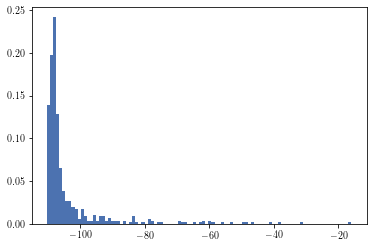

In [20]:
aics = prob_df.aic.to_numpy()
bics = prob_df.bic.to_numpy()
plt.hist(aics, bins=100, density=True);
# plt.hist(bics, bins=30, density=True);

In [21]:
aics.min()

-110.27779388916804